<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Book%201/Chap04/1.LossFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Setting

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


# Library Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

%matplotlib inline

ModuleNotFoundError: ignored

# Loss Function

- 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다.  
이때 사용하는 지료가 **손실 함수(loog function)**이다.  
일반적으로 손실함수는 통계학에서 사용하는 회귀분석에 자주 나타는 **평균 제곱 오차(Mean Squared Error, MSE)**  
와 **교차 엔트로피 오차(Cross Entropy Error, CEE)**를 사용한다.  

- 손실 함수는 간단하게 말하면 신경망 성능의 '나쁨'을 나타내는 지표이다.  
즉, 훈련 데이터를 얼마나 잘 처리하지 '못'하냐를 나타낸다.

## Mean Squared Error (MSE)

최소 제곱 오차 (Mean Squared Error, MSE)는 손실 함수에서 가장 많이 쓰인다.  

$$
MSE = \frac{1}{2}\sum_{k} (y_{k}-t_{k})^{2}
$$  

- $y_{k}$ : 신경망의 출력(추정값)
- $t_{k}$ : 정답 label (one-hot encoding)
- $k$ : 데이터의 차원  

이해를 돕기위해 아래의 간단한 예시를 보자.

### Simple example of MSE

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

여기서 `y`는 softmax를 통해 나온 출력값이다.  
t는 원-핫 인코딩을 통해 찾은 정답 인덱스 표시값이다.  
이제 MSE를 구현하는 함수를 만들어 보자.

#### Implementation of MSE

In [ ]:
def MSE(y, t):
  return 0.5 * np.sum((y - t) ** 2)

In [ ]:
# ex1 : predict '2' is high percentage
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(MSE(np.array(y), np.array(t)))

# ex2 : predict '7' is high percentage
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(MSE(np.array(y), np.array(t)))

0.09750000000000003
0.5975


위의 예를 보면 첫번째 예의 손실 함수 출력이 작으며 정답 레이블과 오차가 작다.  
결과적으로 MSE 기준으로는 첫 번째 결과가 정답에 더 가까운 것으로 추정한다.

## Cross Entropy Error (CEE)

$$
CEE = -\sum_{k} (t_{k}\ln{y_{k}})
$$  

- $y_{k}$ : 신경망의 출력(추정값)
- $t_{k}$ : 정답 label (one-hot encoding)
- $k$ : 데이터의 차원  

자연로그 연산을 하는 것을 알 수 있다. 결과적으로 모든 값은 양수로 나타난다.  
대신에 $t_{k}$는 원-핫 인코딩 값을 갖고 있으므로 정답으로 판정되는 값의 출력이 전체 값을 정한다.

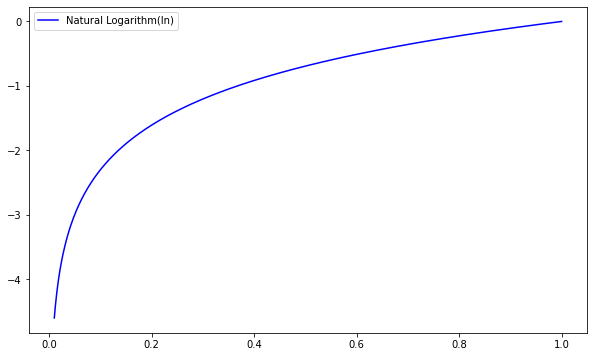

In [8]:
# 자연로그 그래프 그리는 코드
# X값 생성
x = np.linspace(start=0.01, stop=1.0, num=1000)

plt.figure(figsize=(10, 6)) # 크기 지정

# 자연로그(Natural Logarithm) Y값 생성 
plt.plot(x, np.log(x), 'b-', label='Natural Logarithm(ln)')
plt.legend()

자연로그 그래프를 보면 x가 1이면 y가 0이되고 x가 0에 가까울수록 y는 점점 작아진다.  
결과적으로 CEE의 식을 보면 출력값이 커질수록 0에 가까워지다가, 출력이 1이되면 값이 0이된다.  
즉 결과적으로 정답일 확률이 낮아질수록 오차값이 커진다. (물론 원-핫 인코딩이라 0 아니면 1이다.)  
= 오차값이 크다 -> 정답일 확률이 낮다.

### Simple example of CEE

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#### Implementation of CEE

In [ ]:
def CEE(y, t):
  delta = 1e-7 # np.log에 0이 들어가서 -inf로 연산이 불가능하게 되는 것을 막기위함
  
  return -np.sum(t * np.log(y + delta))

In [ ]:
# ex1 : predict '2' is high percentage
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(CEE(np.array(y), np.array(t)))

# ex2 : predict '7' is high percentage
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(CEE(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


위의 예로 CEE를 계산하면 아래와 같다.  
첫 번째 예시의 $t_{k}\ln{y_{k}}$를 계산하면 1 * ln(0.6) = 약 0.51이다.  
두 번째 예시의 $t_{k}\ln{y_{k}}$를 계산하면 1 * ln(0.1) = 약 2.3이다.  
즉 계산결과(오차)가 더 작은 첫 번째 추정이 정답일 가능성이 높다.

# Mini Batch Learning

훈련 데이터를 통해 손실 함수가 가장 작아지는 매개변수를 찾아야한다.  
결국 모든 훈련 데이터를 대상으로 손실 함수를 구해야한다. <- 배치 프로세싱  
이 경우를 생각해서 CEE를 수정하면 다음과 같다.  

$$
CEE = -\frac{1}{N}\sum_{n} \sum_{k} (t_{nk}\ln{y_{nk}})
$$  

데이터가 N개일때, $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다.  
이때 N으로 나누는 이유는 정규화 작업을 진행하는 것이다. ('평균 손실 함수')  

하지만 이 식을 실제로 구현하면 이중 for문의 형태가 나타나는데, 시간복잡도가 $O(n^2)$이 되므로 데이터 값이 커질수록 시간 효율은 극악이 된다.  

이를 해결하는 방법이 데이터의 일부만 추려서 '근사치'를 활용하는 **미니배치(mini-batch)**를 사용한다.


## Mini batch with MNIST


### Load MNIST

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


### Extract random data

In [ ]:
train_size = x_train.shape[0]
# extraction size
batch_size = 10 
# choice is random extract function
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### Implementation CEE for mini batch

In [ ]:
# 이 부분은 다시 잘 이해해보기
def CEE(y, t, one_hot=True):
  if one_hot:
    # one-hot encoding data
    if y.ndim == 1:
      t = t.reshape(t, t.size)
      y = y.reshape(y, y.size)

    batch_size = y.shape[0]

    return -np.sum(t * np.log(y + 1e-7)) / batch_size

  else:
    if y.ndim == 1:
      t = t.reshape(t, t.size)
      y = y.reshape(y, y.size)

    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# Why use loss function?



이쯤되면 왜 귀찮고 이해하기 어렵게 손실함수를 사용하는 지가 생각이 든다.  
사실 직관적이고 바로바로 알아볼 수 있게 '정확도'를 사용하면 안될까?라는 생각도 할 수 있다.  
이 질문의 답은 '미분'이 갖는 역할에 주목하면 알 수 있다.  

신경망 학습에서 최적의 매개변수를 탐색할 때 손실 함수를 가능한 작게 만드는 매개변수를 찾는다.  
이 의미는 수학적으로 바라보면 극소, 최소를 찾는 것이라 볼 수 있다.  
이 과정에서 미분이 사용된다.  

여기서 미분 값이 음수면 매개변수를 양의 방향으로, 값이 양수면 매개변수를 음의 방향으로 조정한다.  
하지만 미분 값이 0이라면 어떠한 조정도 이루어지지 않는다.  

그렇다면 이게 왜 정확도를 쓸 수 없는가?의 답인 걸까?

## Why can't we use accuracy



'정확도'를 지표로 삼게되면 매개변수의 미분 값이 대대분의 지점에서 0이 된다.  
왜 '정확도'는 대부분의 미분 값이 0이될까?  

예를 들어 생각해보자. 100장의 이미지 중에 32장이 올바르게 인식했다고 하자.  
이때의 정확도는 32%가 된다.  
만약 정확도를 사용해서 수치를 조정해도 정확하게 33장이 올바르게 인식되지 않는다면 계속해서 32%의 정확도를 갖는다.  
그리고 개선이 된다고 해도 33%, 34%처럼 **부드러운**형태가 아닌 불연속적인 변화가 나타나는 **계단함수**가 된다.  

즉 매개변수의 미세한 변화가 주는 변화를 계단 함수는 무효화시켜 버리기 때문에 손실 함수에는 변화가 나타나지 않는다.  

하지만 시그모이드 형태의 함수는 지속적인 변화가 나타나고 어떤 부분에서도 0의 미분값이 나타나지 않는다.  
이런 이유로 '정확도'가 아닌 '손실함수'를 사용하는 것이다.